In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
from scipy.stats import chi2_contingency, pearsonr

if not os.path.abspath(os.pardir) in sys.path:
    sys.path.append(os.path.abspath(os.pardir))

from src.data_reader import read_data

plt.rcParams['figure.figsize'] = (8, 6) 

/home/francesco/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Costants

In [2]:
DATA_PATH = '../data/'

TRAIN_FNAME = 'census_income_learn.csv'
TEST_FNAME = 'census_income_test.csv'
METADATA_FNAME = 'census_income_metadata.txt'

COLORS = ['#4DC9C3', '#221C35', '#FCCD20', '#20C3EF', '#00B257', '#FF7700']

TARGET_NAME = 'income'

In [3]:
train_df = read_data(DATA_PATH + TRAIN_FNAME, DATA_PATH + METADATA_FNAME)
test_df = read_data(DATA_PATH + TEST_FNAME, DATA_PATH + METADATA_FNAME)
test_df

Read input data file ../data/census_income_learn.csv


/home/francesco/dku-iw/src/data_reader.py:95: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x:x.lower().strip() if (isinstance(x, str)) else (x))


Read metadata file ../data/census_income_metadata.txt
Couldnt parse line 
Mapped columns


/home/francesco/dku-iw/src/data_reader.py:116: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x:np.nan if (isinstance(x, str) and (('not in universe' in x) or ('?' in x) or (x == 'na')


Read input data file ../data/census_income_test.csv


/home/francesco/dku-iw/src/data_reader.py:95: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x:x.lower().strip() if (isinstance(x, str)) else (x))


Read metadata file ../data/census_income_metadata.txt
Couldnt parse line 
Mapped columns


/home/francesco/dku-iw/src/data_reader.py:116: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x:np.nan if (isinstance(x, str) and (('not in universe' in x) or ('?' in x) or (x == 'na')


,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,migration_prev_res_in_sunbelt,veterans_benefits,weeks_worked_in_year,year,income
0,38,private,6,36,1st 2nd 3rd or 4th grade,0,NaN,married-civilian spouse present,manufacturing-durable goods,machine operators assmblrs & inspctrs,...,mexico,mexico,mexico,foreign born- not a citizen of u s,0,NaN,2,12,95,- 50000.
1,44,self-employed-not incorporated,37,12,associates degree-occup /vocational,0,NaN,married-civilian spouse present,business and repair services,professional specialty,...,united-states,united-states,united-states,native- born in the united states,0,NaN,2,26,95,- 50000.
2,2,NaN,0,0,children,0,NaN,never married,NaN,NaN,...,united-states,united-states,united-states,native- born in the united states,0,NaN,0,0,95,- 50000.
3,35,private,29,3,high school graduate,0,NaN,divorced,transportation,executive admin and managerial,...,united-states,united-states,united-states,native- born in the united states,2,NaN,2,52,94,- 50000.
4,49,private,4,34,high school graduate,0,NaN,divorced,construction,precision production craft & repair,...,united-states,united-states,united-states,native- born in the united states,0,NaN,2,50,95,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99757,14,NaN,0,0,children,0,NaN,never married,NaN,NaN,...,united-states,united-states,united-states,native- born in the united states,0,NaN,0,0,95,- 50000.
99758,61,private,8,36,11th grade,0,NaN,separated,manufacturing-durable goods,machine operators assmblrs & inspctrs,...,united-states,united-states,united-states,native- born in the united states,0,NaN,2,52,95,- 50000.
99759,24,self-employed-not incorporated,1,43,7th and 8th grade,0,NaN,married-civilian spouse present,agriculture,farming forestry and fishing,...,mexico,mexico,mexico,foreign born- u s citizen by naturalization,0,NaN,2,52,94,- 50000.
99760,30,private,45,2,bachelors degree(ba ab bs),0,NaN,married-civilian spouse present,other professional services,executive admin and managerial,...,united-states,united-states,united-states,native- born in the united states,0,NaN,2,52,95,- 50000.


In [4]:
#check if numerical mapping is making sense
train_df.describe()

,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


#### On a high level most values make sense, there might be outliers (e.g. wage per hour 9999)
#### We can now check for NAN amounts

In [46]:
train_df.isna().mean(axis = 0)

age                                           0.000000
class_of_worker                               0.502423
detailed_industry_recode                      0.000000
detailed_occupation_recode                    0.000000
education                                     0.000000
wage_per_hour                                 0.000000
enroll_in_edu_inst_last_wk                    0.936950
marital_stat                                  0.000000
major_industry_code                           0.504624
major_occupation_code                         0.504624
race                                          0.000000
hispanic_origin                               0.004380
sex                                           0.000000
member_of_a_labor_union                       0.904452
reason_for_unemployment                       0.969577
full_or_part_time_employment_stat             0.000000
capital_gains                                 0.000000
capital_losses                                0.000000
dividends_

#### A lot of columns have high value of NaN, we can see if best to exclude them from modeling, best not drop rows else there is no more data left

### Let's produce some plots on raw data to check if anything looks off as well as correlation with target

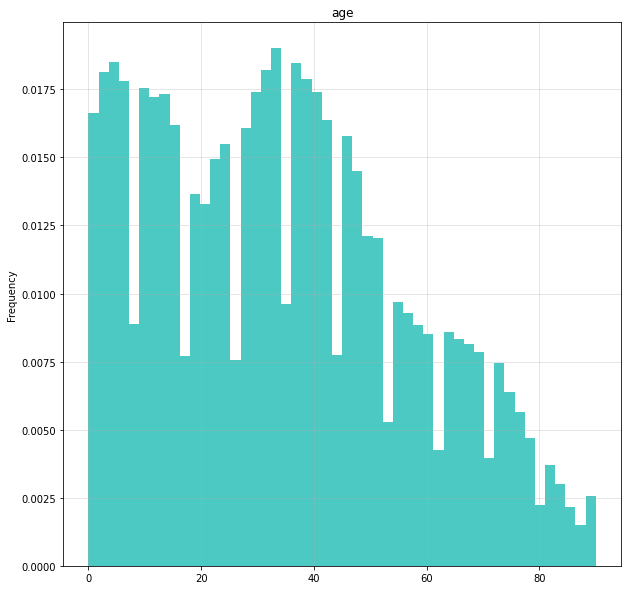

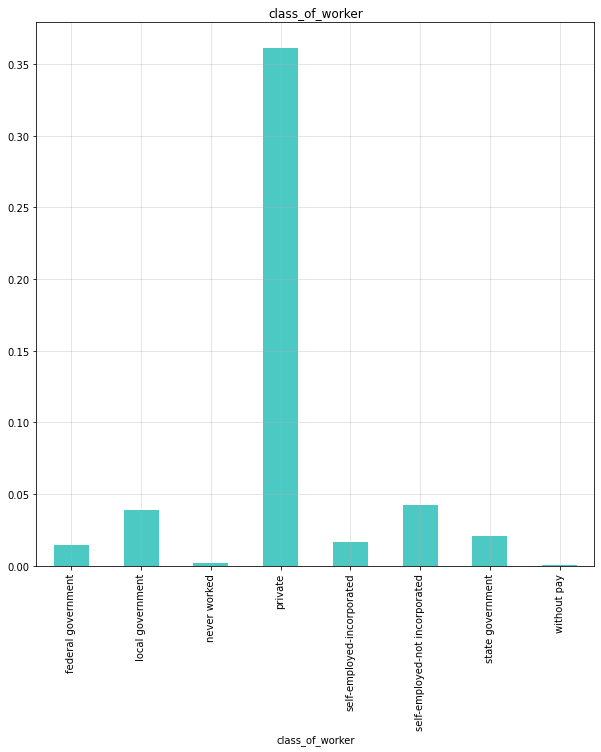

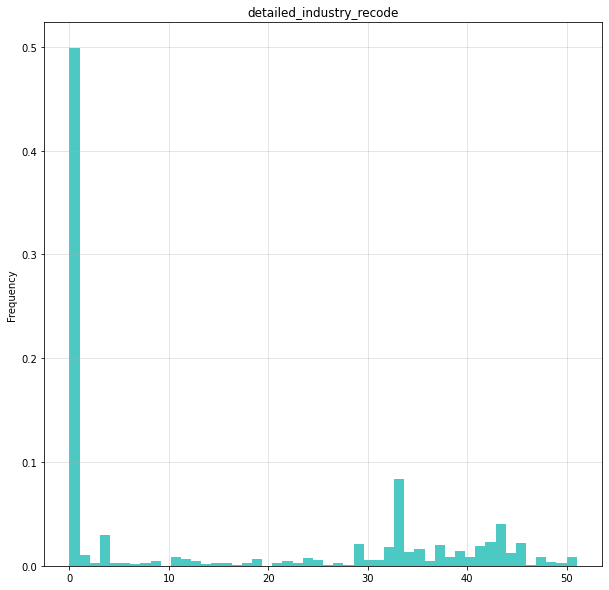

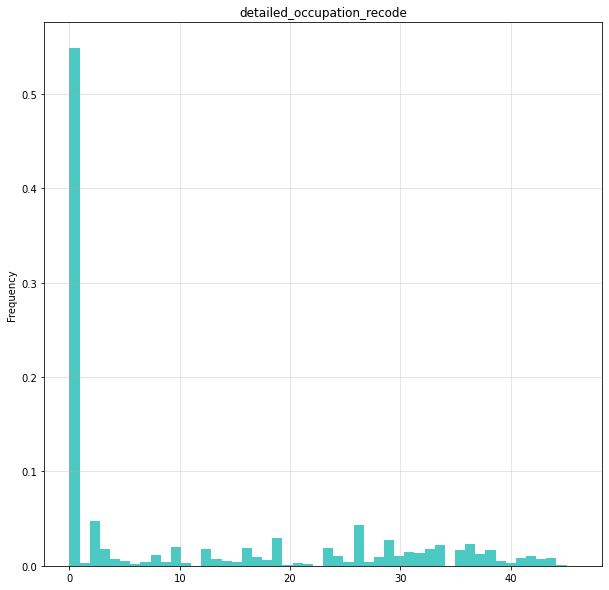

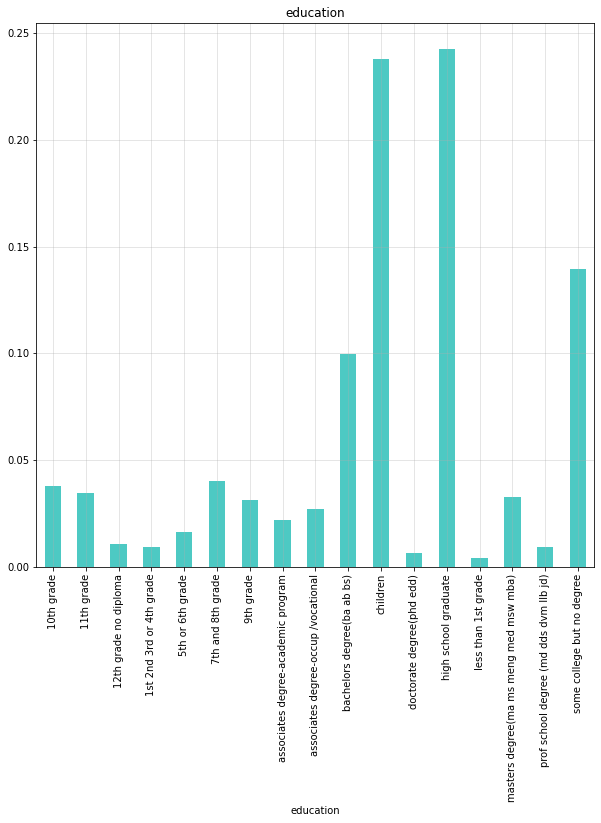

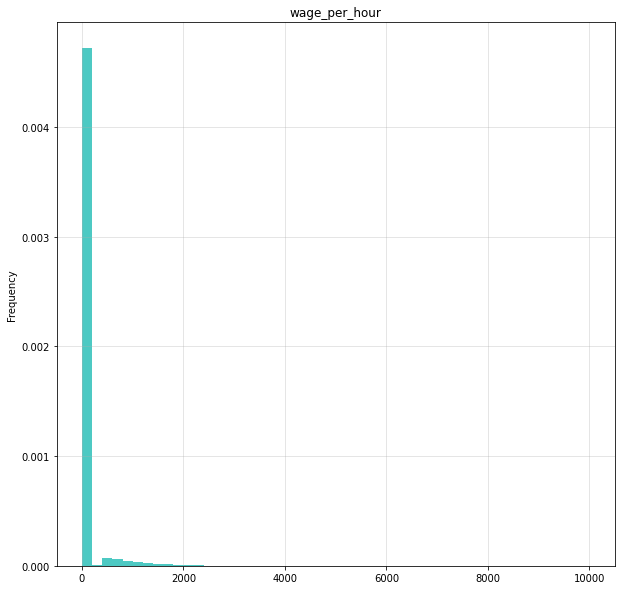

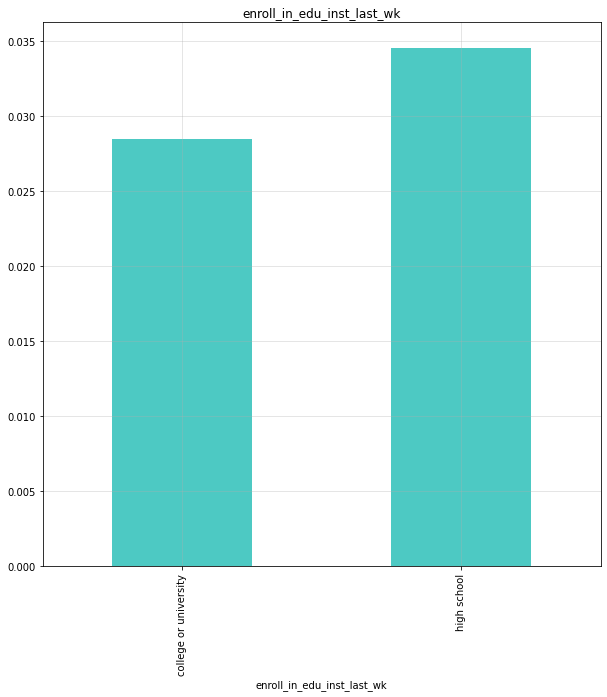

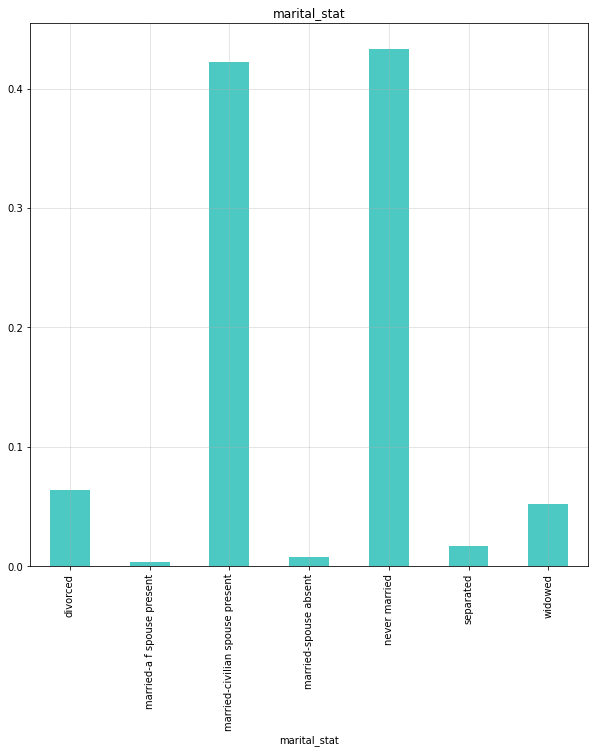

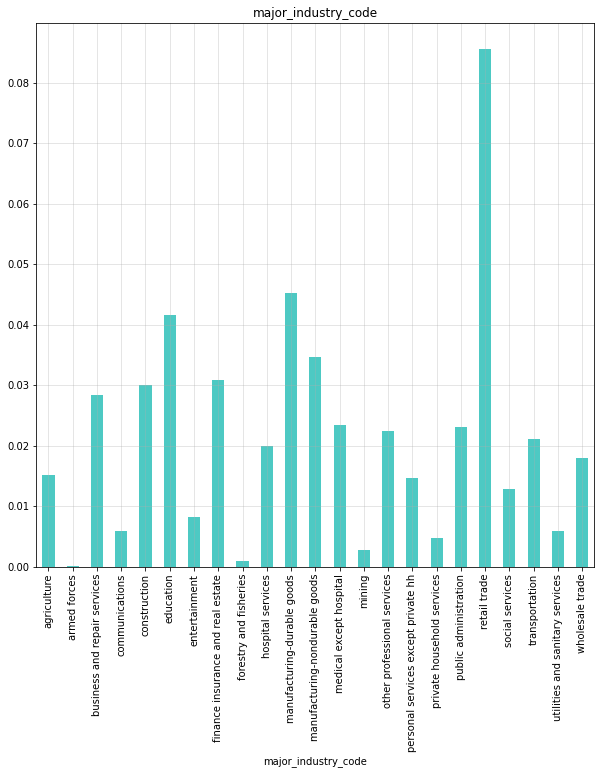

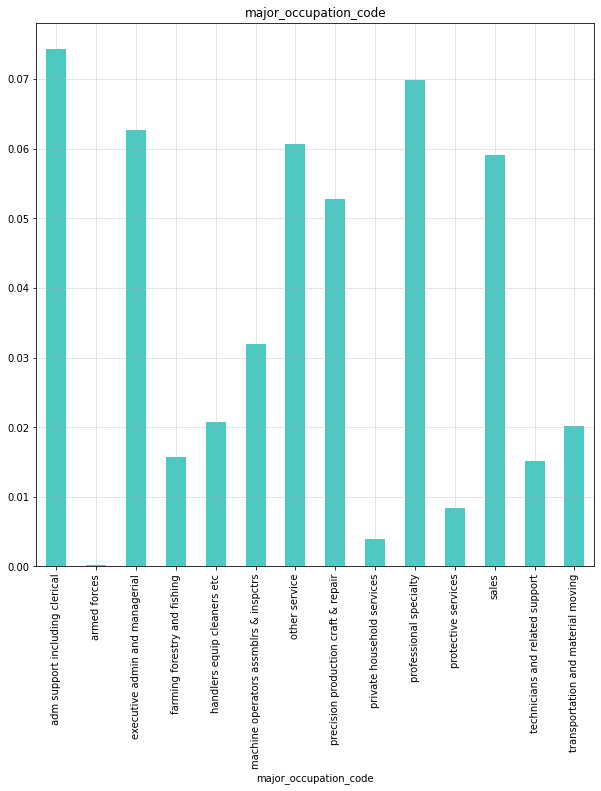

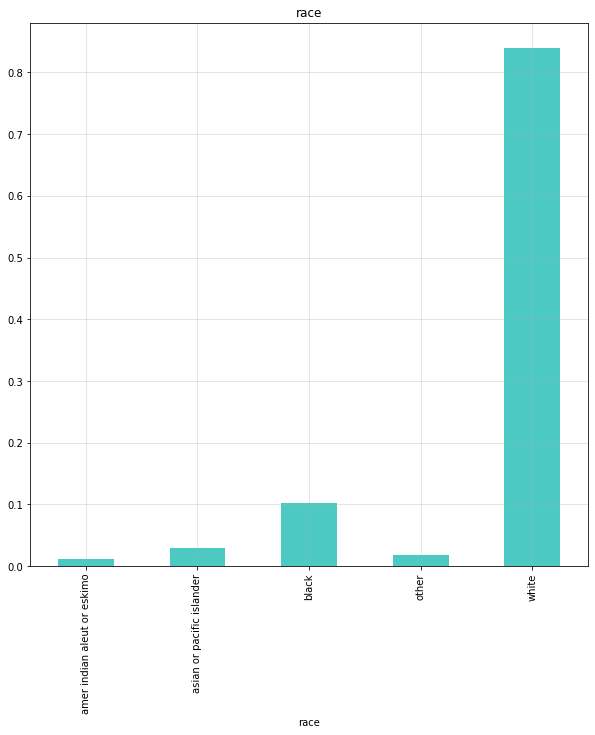

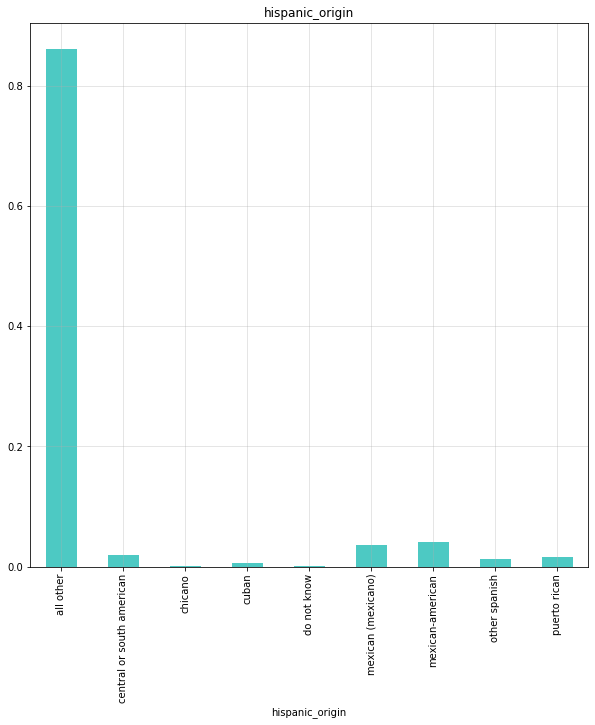

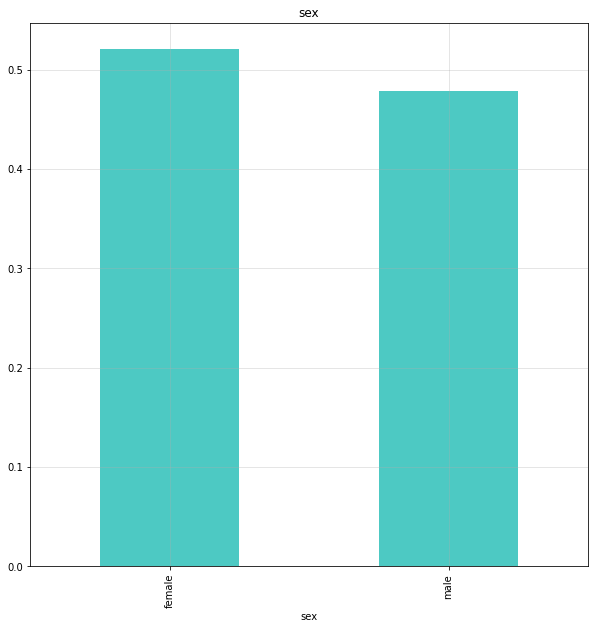

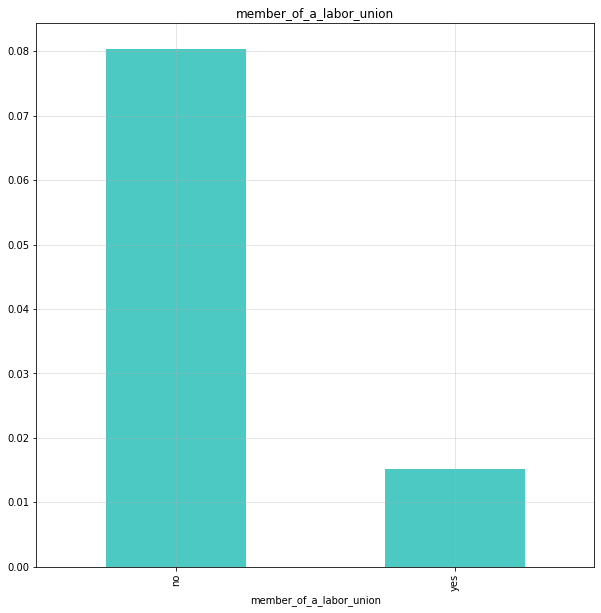

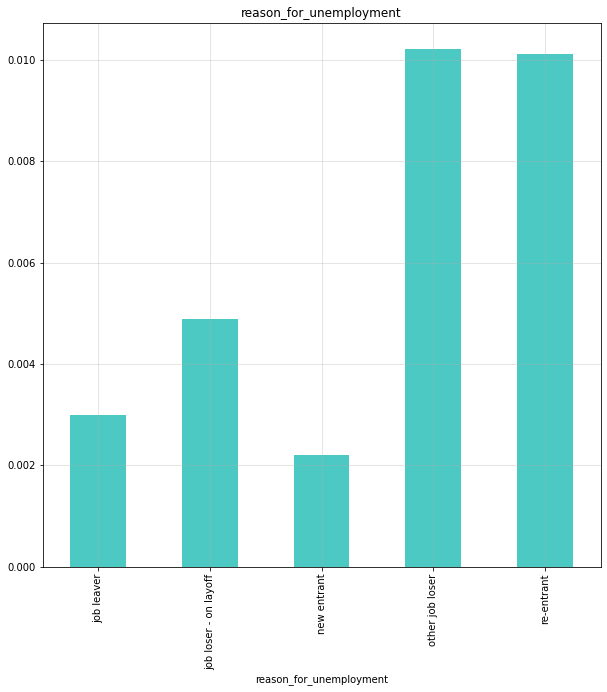

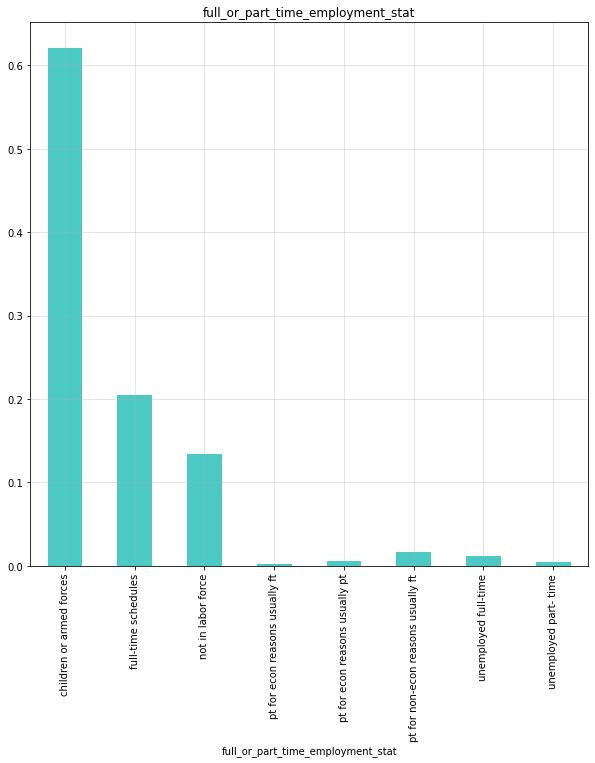

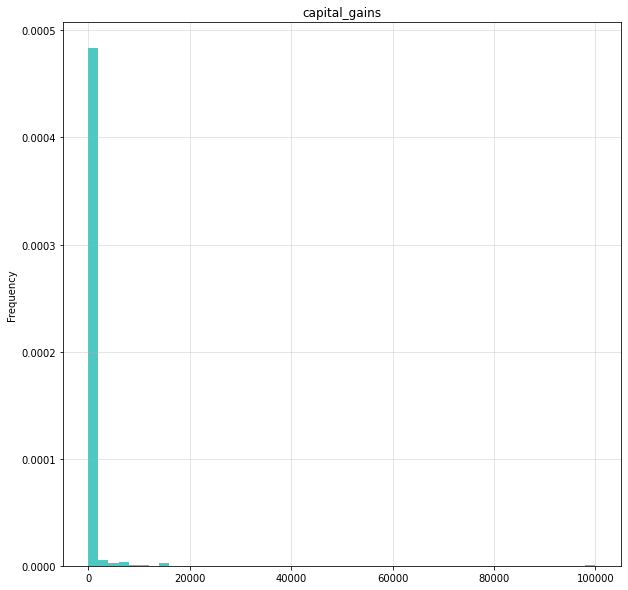

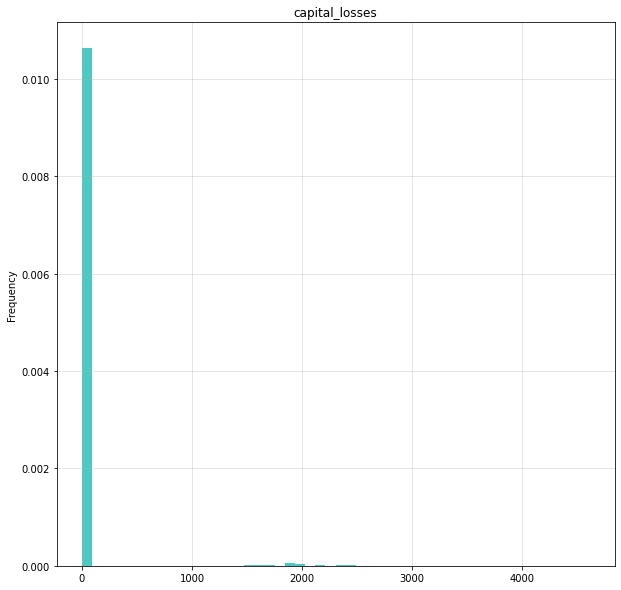

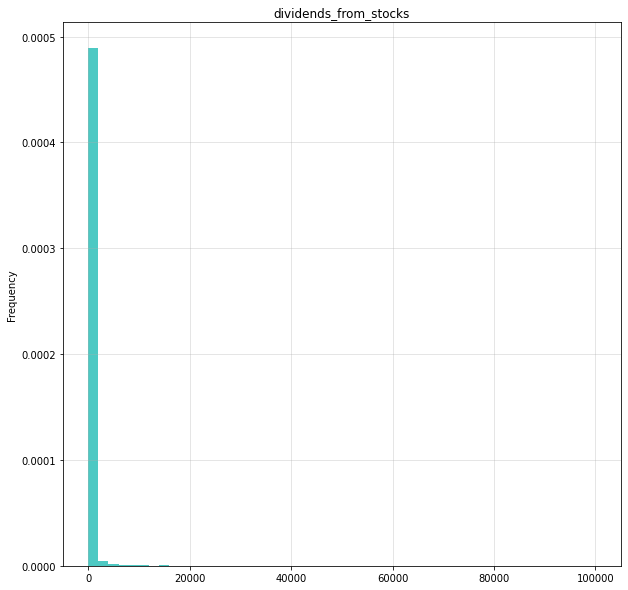

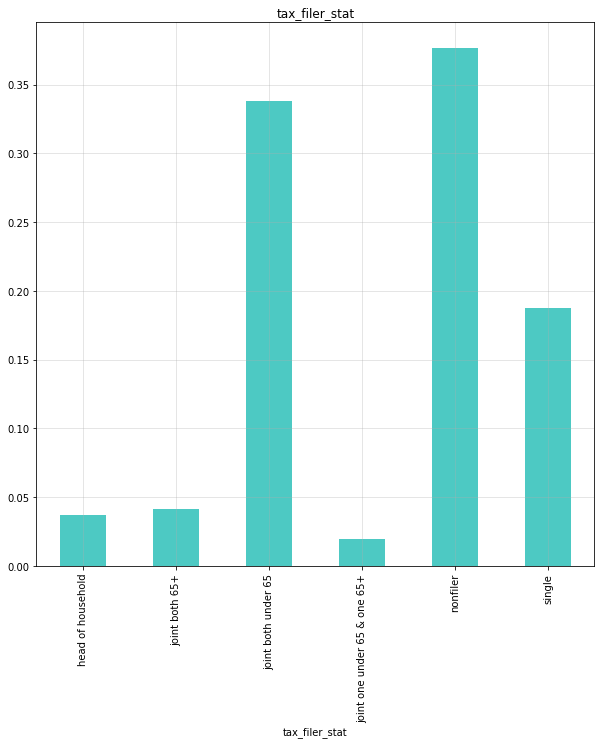

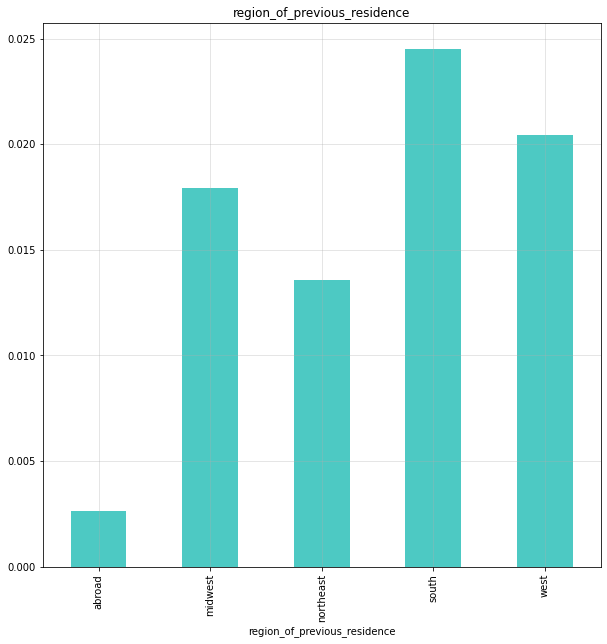

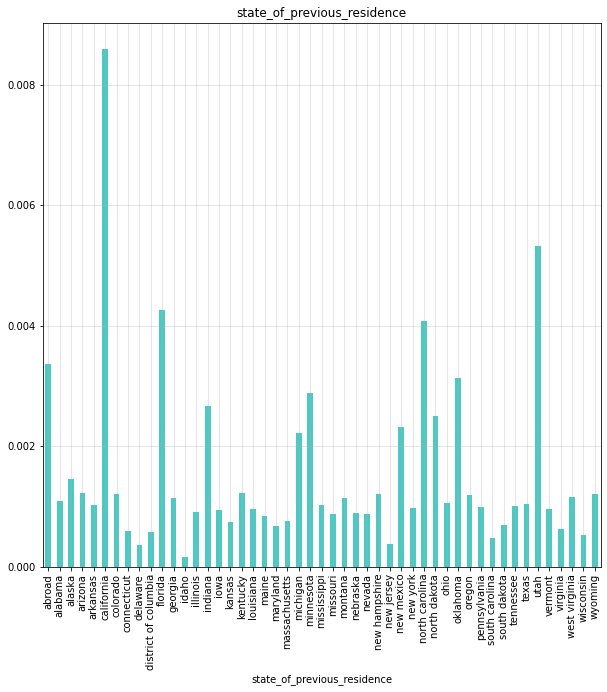

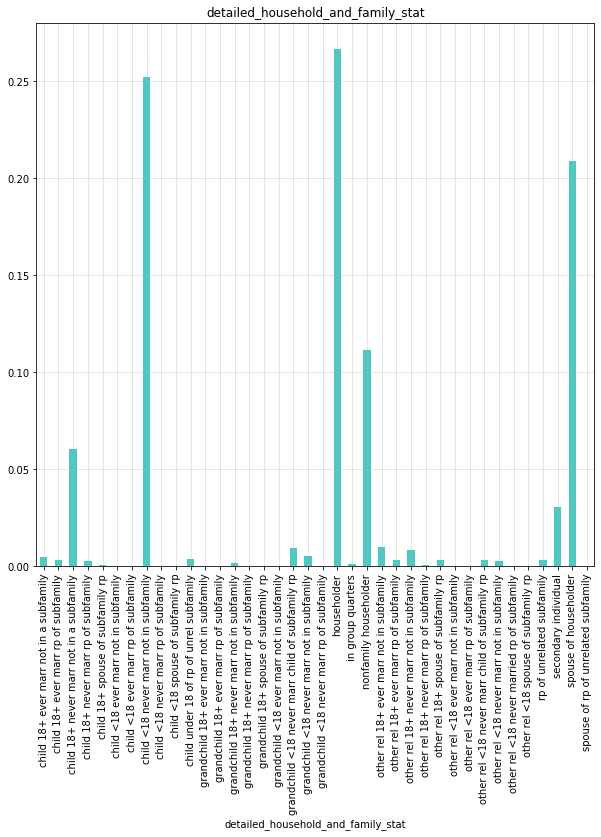

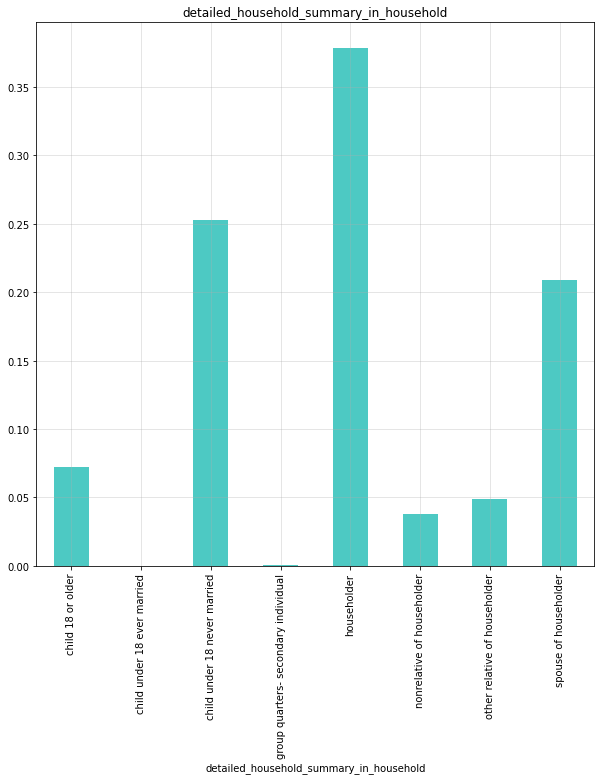

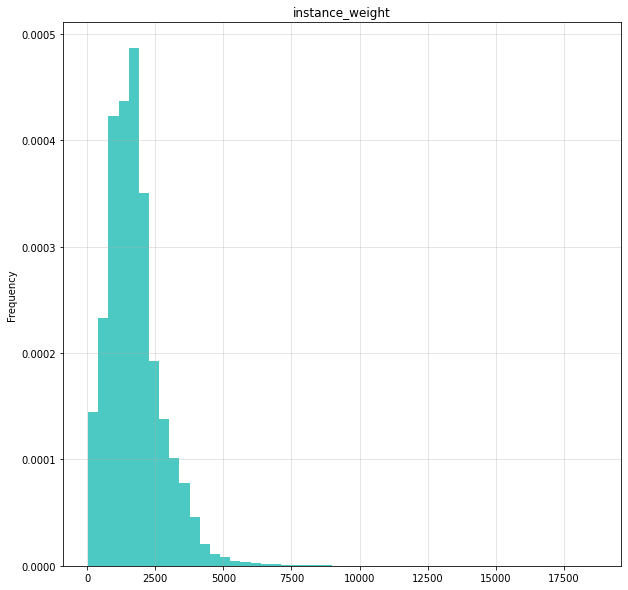

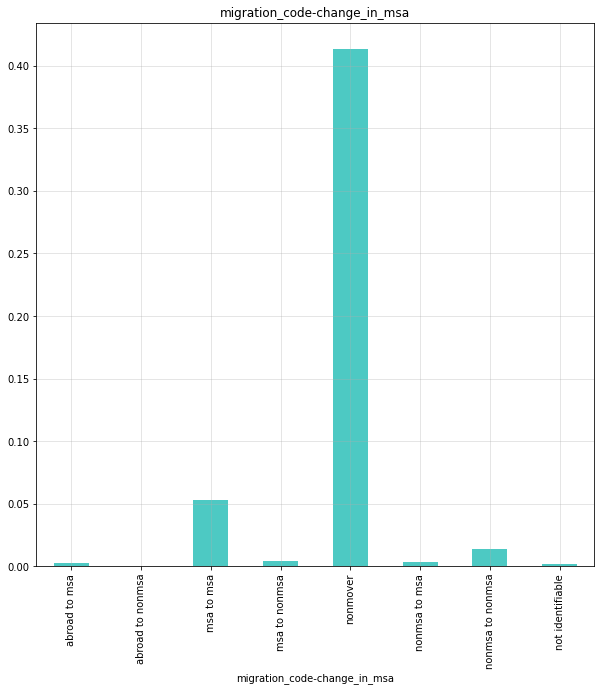

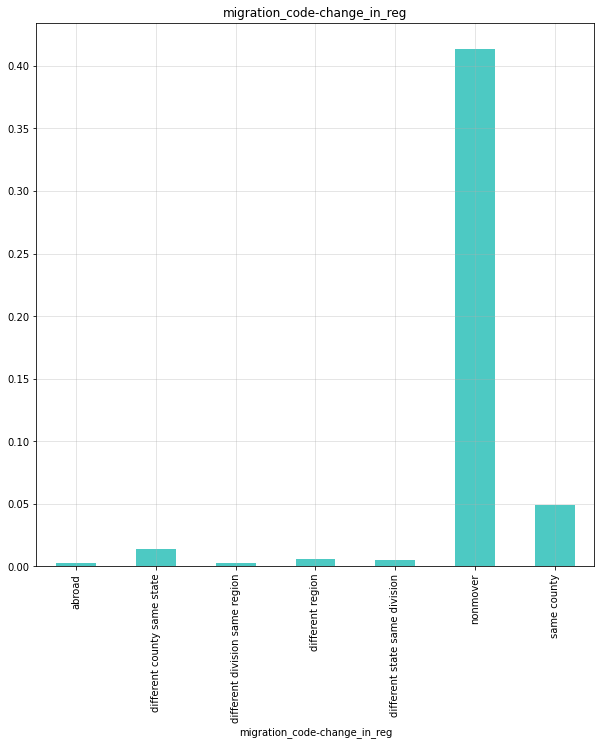

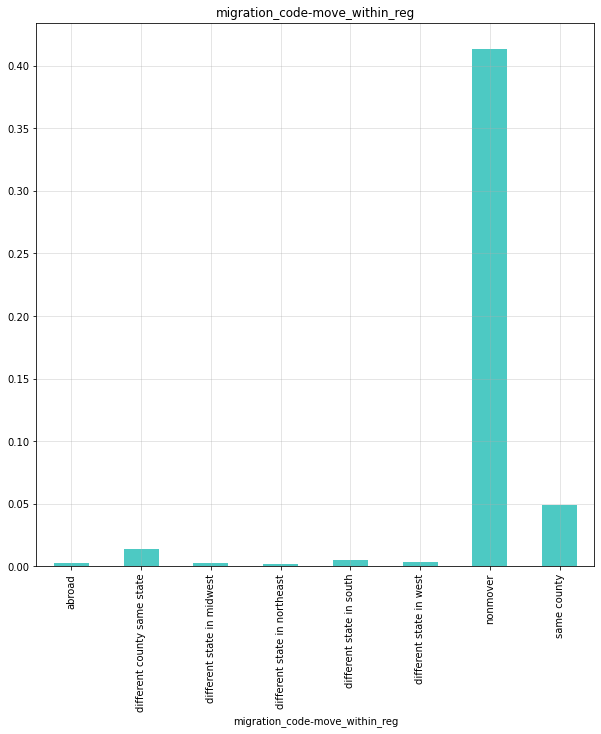

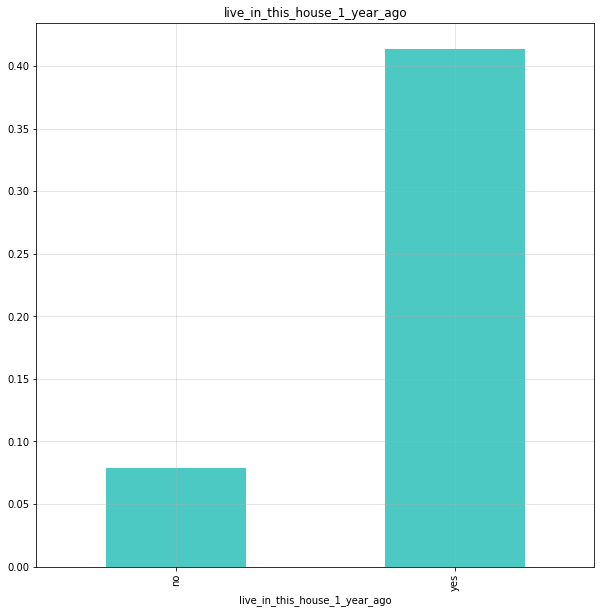

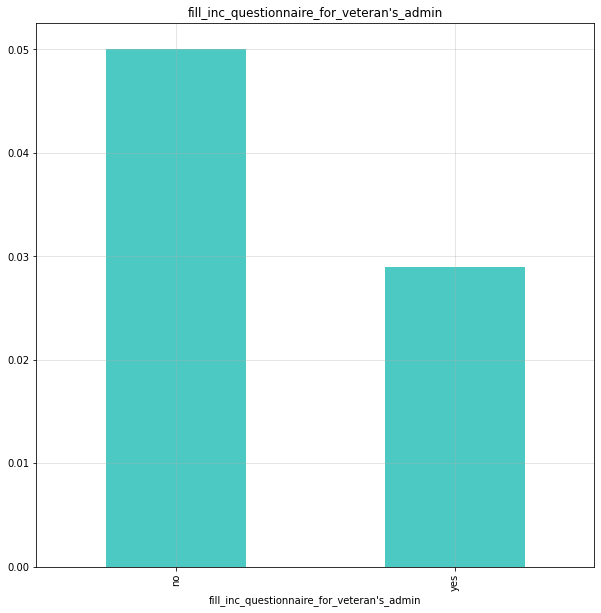

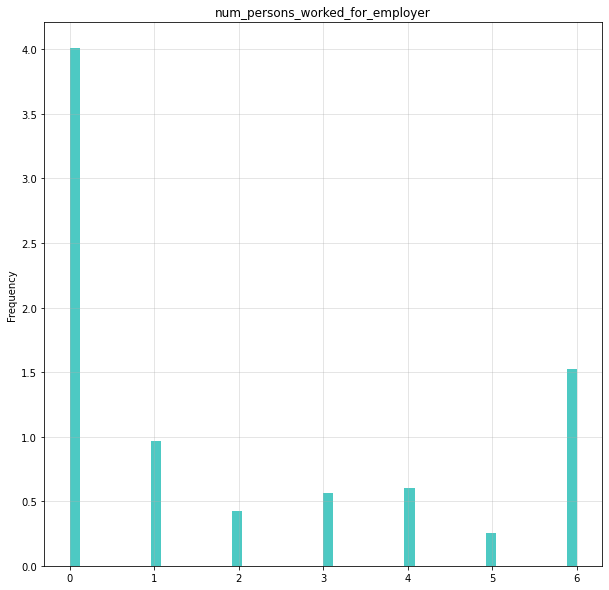

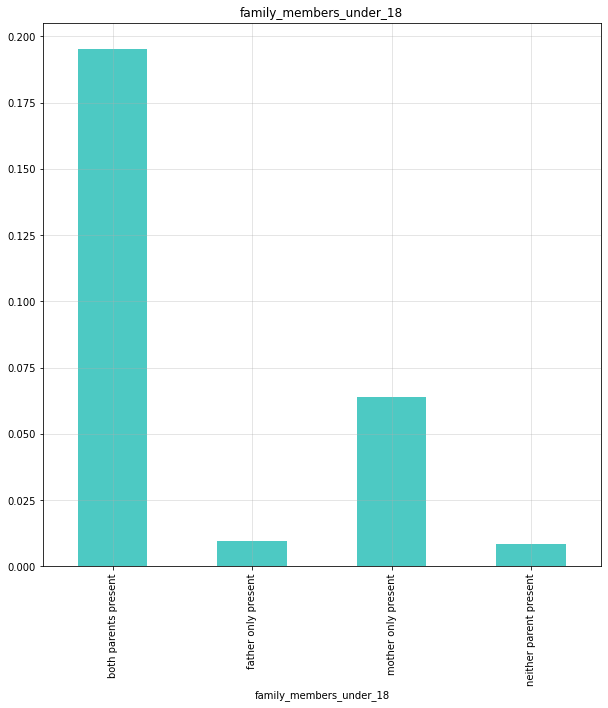

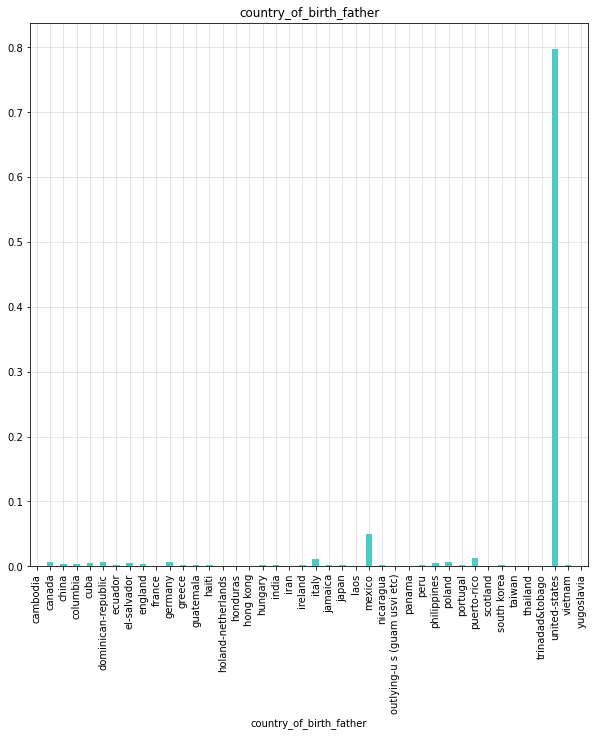

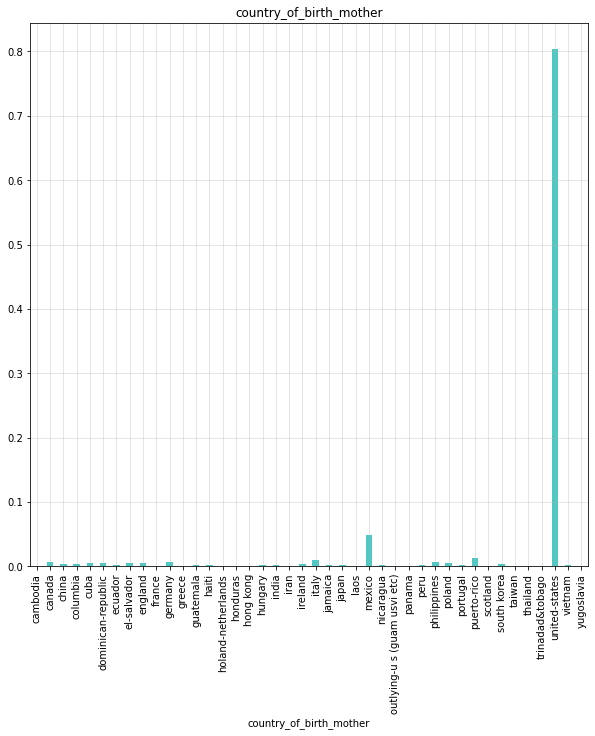

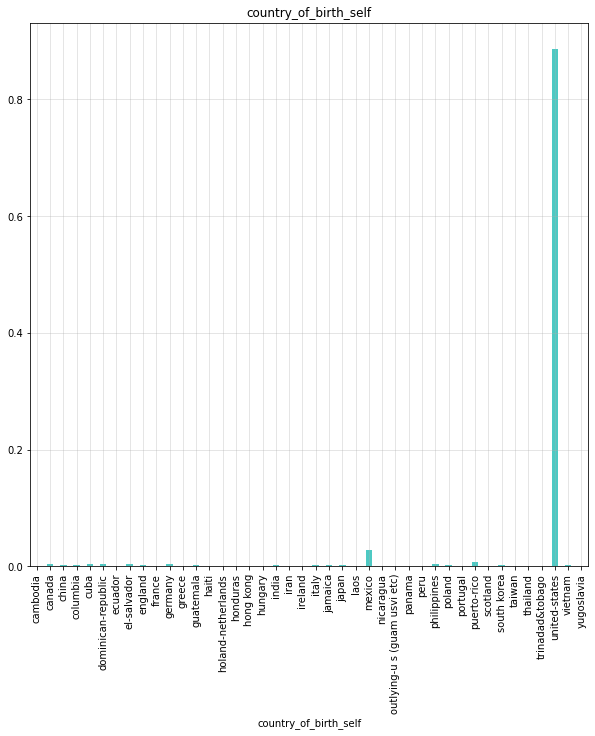

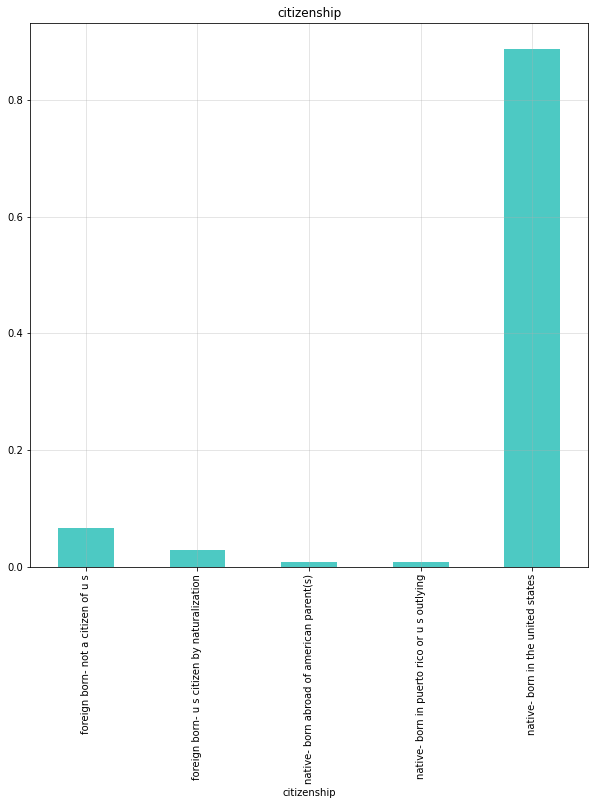

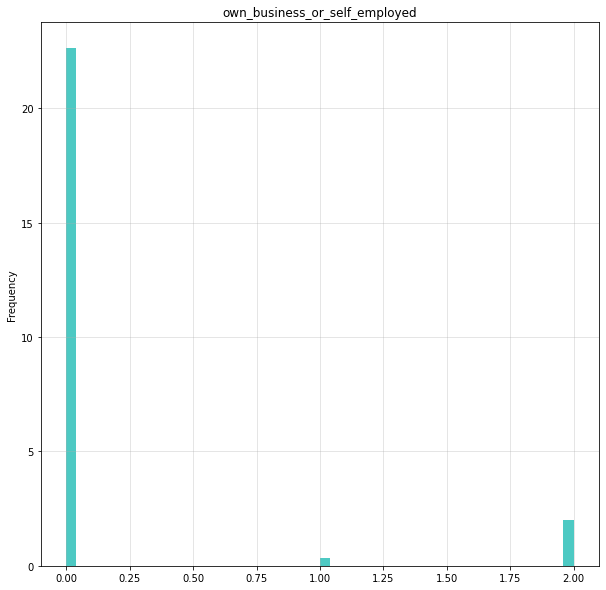

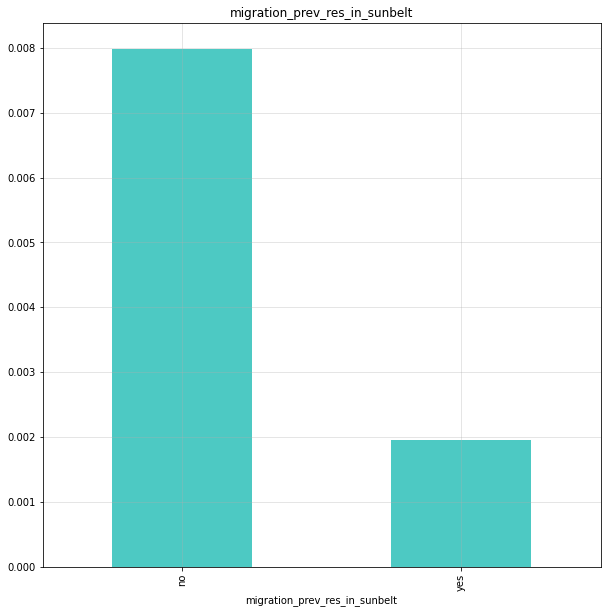

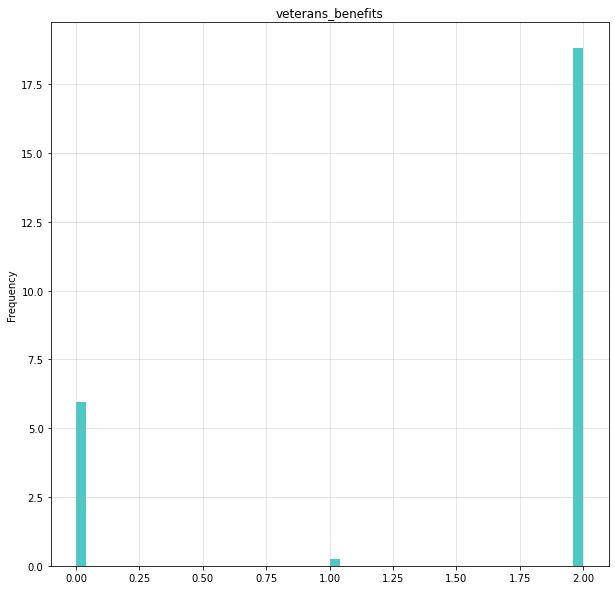

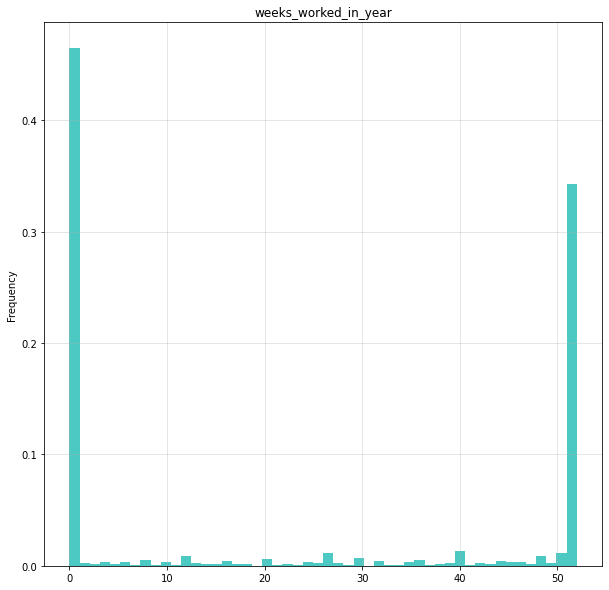

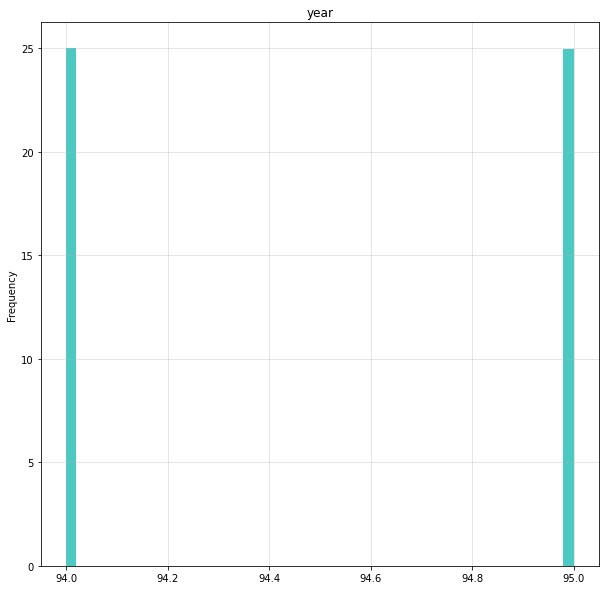

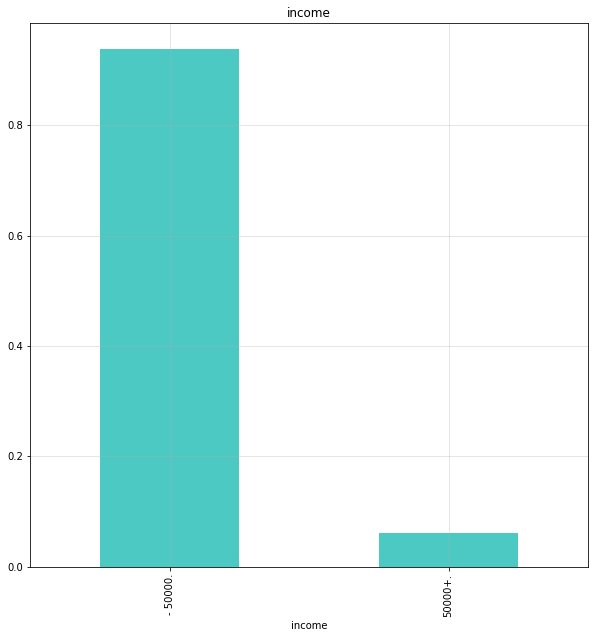

In [67]:
for col in train_df.columns:
    #not object columns
    if train_df[col].dtype != 'O':
        train_df[col].plot.hist(color = COLORS[0],
                               bins = 50,
                               density = True)

    #for object columns we can do differently
    else:
        (train_df.groupby(col).age.count() / len(train_df)).plot.bar(color = COLORS[0])

        plt.xticks(rotation = 90)

    plt.grid('on', alpha = 0.4)
    plt.title(col)
    plt.show()
        

#### Can note high target imbalance (last plot), all other plots look reasonable, some numerical values have distributions with long tails

#### Can now apply Chi-squared test (discrete) and Person correlation (continuous) to check if any obvious relationship is apparent

In [96]:
for col in train_df.columns:
    # object columns use chi2
    if train_df[col].dtype == 'O':
        cont_df = pd.crosstab(train_df[col], train_df[TARGET_NAME],
                              normalize = 'columns')
        
        chi2, p_value, _, __ = chi2_contingency(cont_df)
        if p_value > 0.05:
            print(f'Relationship of {TARGET_NAME} and {col} NOT statistically relevant, p_value {np.round(p_value,3)}')
        else:
            print(f'- Relationship of {TARGET_NAME} and {col} IS statistically relevant, p_value {np.round(p_value,3)}')
    
    # continuos columns use pearson r
    else:
        
        non_na = train_df.dropna(subset = [col])
        non_na[TARGET_NAME] = non_na[TARGET_NAME].apply(lambda x:0 if ('-' in x) else (1))
        r_v, p_value = pearsonr(non_na[col], non_na[TARGET_NAME])
        
        if p_value > 0.05:
            print(f'Relationship of {TARGET_NAME} and {col} NOT statistically relevant, p_value {np.round(p_value,3)} pearson colleation {np.round(r_v, 3)}')
        else:
            print(f'- Relationship of {TARGET_NAME} and {col} IS statistically relevant, p_value {np.round(p_value,3)} pearson colleation {np.round(r_v, 3)}')
        

- Relationship of income and age IS statistically relevant, p_value 0.0 pearson colleation 0.136
Relationship of income and class_of_worker NOT statistically relevant, p_value 1.0
- Relationship of income and detailed_industry_recode IS statistically relevant, p_value 0.0 pearson colleation 0.196
- Relationship of income and detailed_occupation_recode IS statistically relevant, p_value 0.0 pearson colleation 0.013
Relationship of income and education NOT statistically relevant, p_value 1.0
- Relationship of income and wage_per_hour IS statistically relevant, p_value 0.0 pearson colleation 0.025
Relationship of income and enroll_in_edu_inst_last_wk NOT statistically relevant, p_value 1.0
Relationship of income and marital_stat NOT statistically relevant, p_value 0.999
Relationship of income and major_industry_code NOT statistically relevant, p_value 1.0
Relationship of income and major_occupation_code NOT statistically relevant, p_value 1.0
Relationship of income and race NOT statistica

In [47]:
train_df.to_parquet(DATA_PATH + 'train_df.pq')